Analytic solution for Karl Terazaghi. Theoretical soil mechanics. John Wiley and Sons, 1965.

A constant compressive load is applied on the left side of a porous sample while zero displacement is specified on the right side. The porous matrix is fully saturated, and drainage is only allowed across the left side where the compressive load is applied. Fluid pressure on the drainage boundary is fixed at the initial pressure. The variables of interest here are the excess pore pressure and vertical strain as a function of time.


In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [2]:

def excess_pore_pressure(t, x_array, P0, Cv, L, sum_size = 100):
    """ Analytic solution for pressure

    Parameters
    -------------------
        t : float 
            Time in seconds
        x_array : numpy array
            x values of the domain
        p0 : float
            Inlet pressure
        Cv : float 
            coefficient of consolidation 
        L : float 
            Domain Length (m)
        sum_size : int
            truncation length of infinite sum. Default = 100

    Returns 
    -----------------
        pressure : numpy array
            pressure solution 

    Notes
    -----------------
        Infinite sum is approximated using the first sum_size values
    
    """
    print("Computing pressure ")
    pressure = np.zeros_like(x_array)
    for ix, x in enumerate(x_array):
        pressure[ix] = 0
        for n in range(sum_size):
            sum_value = 1 / (2 * n + 1) \
                   * np.sin( ((2 * n + 1) * np.pi * x) / (2*L)) \
                   * np.exp(-((2 * n + 1)**2 * np.pi**2 * Cv * t) / (4*L**2))
            pressure[ix] += sum_value 

    pressure = 4 * P0 / np.pi * pressure
    print("Computing pressure - done")
    return pressure


def vertical_strain(pressure, P0, E, v):
    """ Analytic solution for veritcal strain 

    Parameters
    -------------------
        pressure : numpy array 
            Pressure solution obtained from excess_pore_pressure function 
        P0 : float
            Inlet pressure
        E : float 
            Young's Modulus 
        v : float 
            Poisson's Ratio

    Returns 
    -----------------
        strain : numpy array
            vertical strain solution 

    Notes
    -----------------
        None 

    """
    print("\nComputing Strain")
    strain = np.zeros_like(pressure)
    strain = (pressure - P0) * ((1 - 2 * v) * (1 + v)) / (E * (1 - v))
    print("Computing Strain - done")
    return strain

In [3]:


P0 = 100.0e6 # Inlet Pressure (Pascals)
k = 3e-14 # Matrix Permeability (m^2)
E = 6.0e10 # Young's modulus (Pa)
v = 0.2  #  Poisson Ratio (dimensionless)
K_l = 2.1e9  # Water Bulk Modulus (Pa)
phi = 0.1 #porosity
mu = 0.001  # Water Viscosity (Pa*s)

K_s = E / (1 - 2 * v**2 / (1 - v))  # Solid Bulk Modulus (Pa)
sm = (1.0 - phi) / K_s + phi / K_l  # constrained specific storage
Cv = k / mu / (sm + 1.0 / K_s) # coefficient of consolidation 
P0 = P0 / (K_s * (sm + 1.0 / K_s)) # max. external loading at the left end of domain

# Model Parameters 
L = 24 #Domain length (m)
x_array = np.linspace(1, L, 100)
t = 10
#t = 10.0 * 3600 # time (s)
#dx = 0.1  # spacing of grid points (m)
#Nx = np.ceil(L / dx).astype(int)  # number of grid points
#x_array = np.linspace(dx, L, Nx)

print("\nParameters")
print("--------------------------------------")
print(f"Inlet pressure\t\t{P0} [Pa]")
print(f"Permeability\t\t{k} [m^2]")
print("")
pressure = excess_pore_pressure(t, x_array, P0, Cv, L)
epsilon = vertical_strain(pressure, P0, E, v)


Parameters
--------------------------------------
Inlet pressure		19705974.35095402 [Pa]
Permeability		3e-14 [m^2]

Computing pressure 
Computing pressure - done

Computing Strain
Computing Strain - done


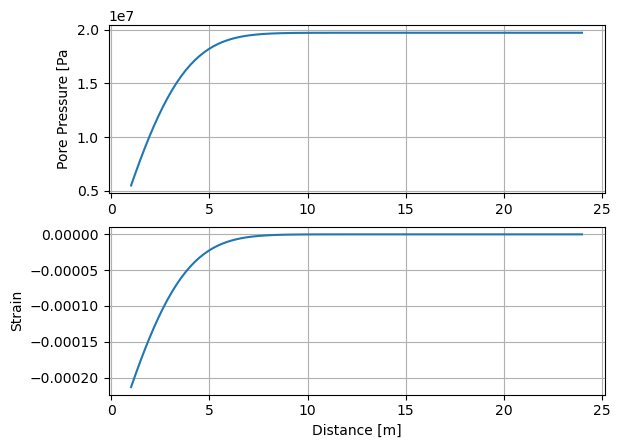

In [5]:
fig,ax = plt.subplots(nrows = 2)
ax[0].plot(x_array, pressure)
ax[0].set_ylabel("Pore Pressure [Pa]")
ax[0].grid(True)
ax[1].plot(x_array, epsilon)
ax[1].set_ylabel("Strain")
ax[1].grid(True)
plt.xlabel("Distance [m]")
plt.show()